In [5]:
import pandas as pd

# Define file paths
file_paths = {
    "agency": 'agency.txt',
    "calendar": 'calendar.txt',
    "routes": 'routes.txt',
    "shapes": 'shapes.txt',
    "shop_times": 'shop_times.txt',
    "stops": 'stops.txt',
    "trips": 'trips.txt'
}

# Read CSV files and store DataFrames in a dictionary
data_frames = {}
for name, path in file_paths.items():
    try:
        data_frames[name] = pd.read_csv(path)
    except FileNotFoundError:
        print(f"Error: The file {path} was not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: The file {path} is empty.")
    except pd.errors.ParserError:
        print(f"Error: There was a parsing error with the file {path}.")

# Create a dictionary with overviews of the DataFrames
data_overviews = {name: df.head() for name, df in data_frames.items() if not df.empty}

# Display the overviews
data_overviews


Error: The file shop_times.txt was not found.


{'agency':   agency_id                   agency_name                      agency_url  \
 0      DMRC  Delhi Metro Rail Corporation  http://www.delhimetrorail.com/   
 
   agency_timezone  agency_lang  agency_phone  agency_fare_url  agency_email  
 0    Asia/Kolkata          NaN           NaN              NaN           NaN  ,
 'calendar':   service_id  monday  tuesday  wednesday  thursday  friday  saturday  sunday  \
 0    weekday       1        1          1         1       1         0       0   
 1   saturday       0        0          0         0       0         1       0   
 2     sunday       0        0          0         0       0         0       1   
 
    start_date  end_date  
 0    20190101  20251231  
 1    20190101  20251231  
 2    20190101  20251231  ,
 'routes':    route_id  agency_id route_short_name  \
 0        33        NaN           R_SP_R   
 1        31        NaN           G_DD_R   
 2        29        NaN           P_MS_R   
 3        12        NaN             M_JB

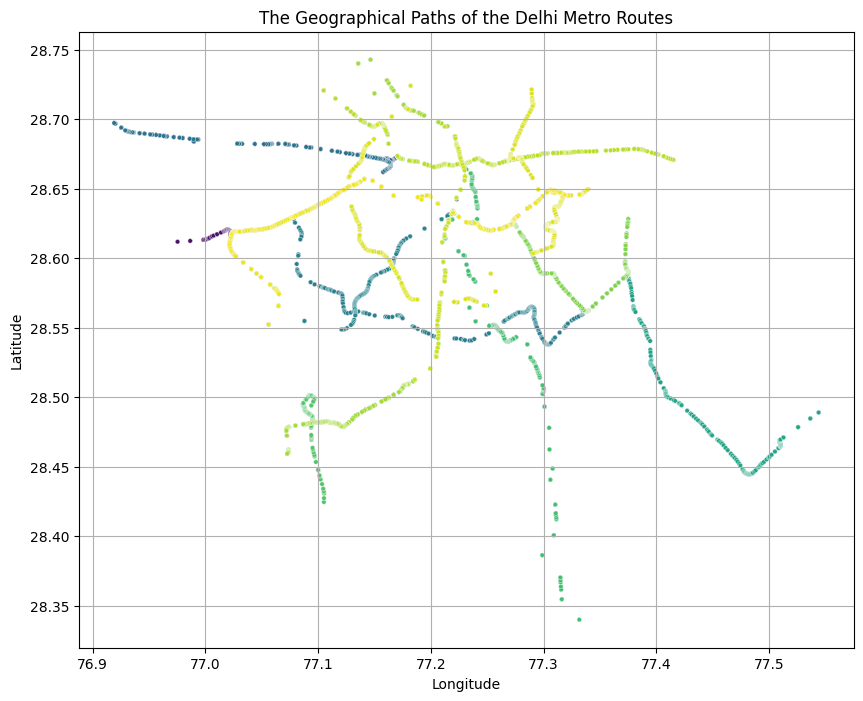

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(10,8))
sns.scatterplot(x='shape_pt_lon', y='shape_pt_lat', hue='shape_id', data=shapes, palette='viridis', s=10, legend=None)
plt.title('The Geographical Paths of the Delhi Metro Routes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# merge trips with calendar to include the day of operation information
trips_calendar = pd.merge(trips, calendar, on='service_id', how='left')

# count the number of trips per day of the week
trip_counts = trips_calendar[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum()

# Plotting
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

NameError: name 'trips' is not defined

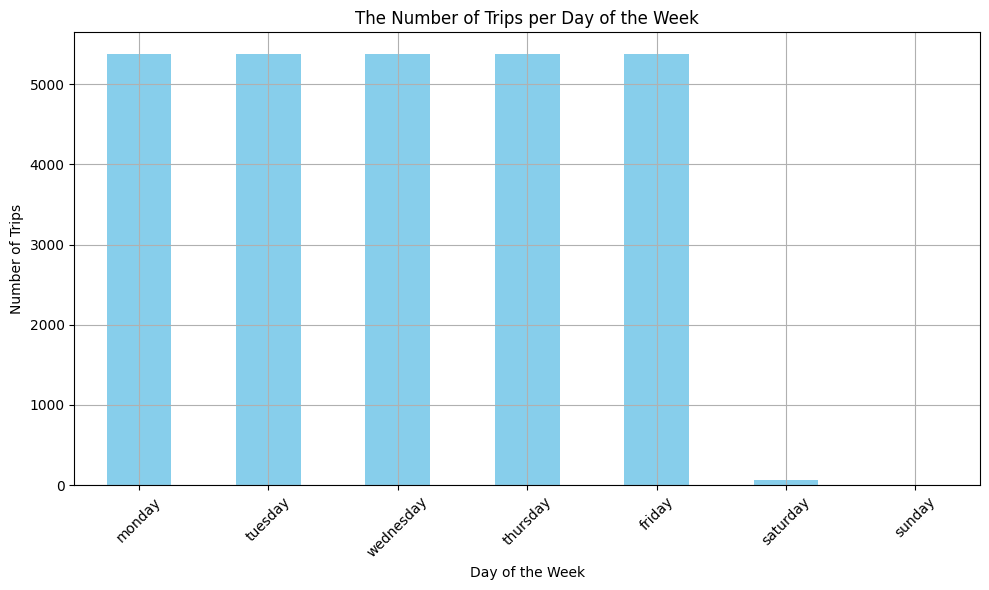

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
trips = pd.read_csv('trips.txt')
calendar = pd.read_csv('calendar.txt')

# Merge trips and calendar on 'service_id'
trips_calendar = pd.merge(trips, calendar, on='service_id', how='left')

# Calculate the number of trips per day of the week
trip_counts = trips_calendar[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
trip_counts.plot(kind='bar', color='skyblue')
plt.title('The Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

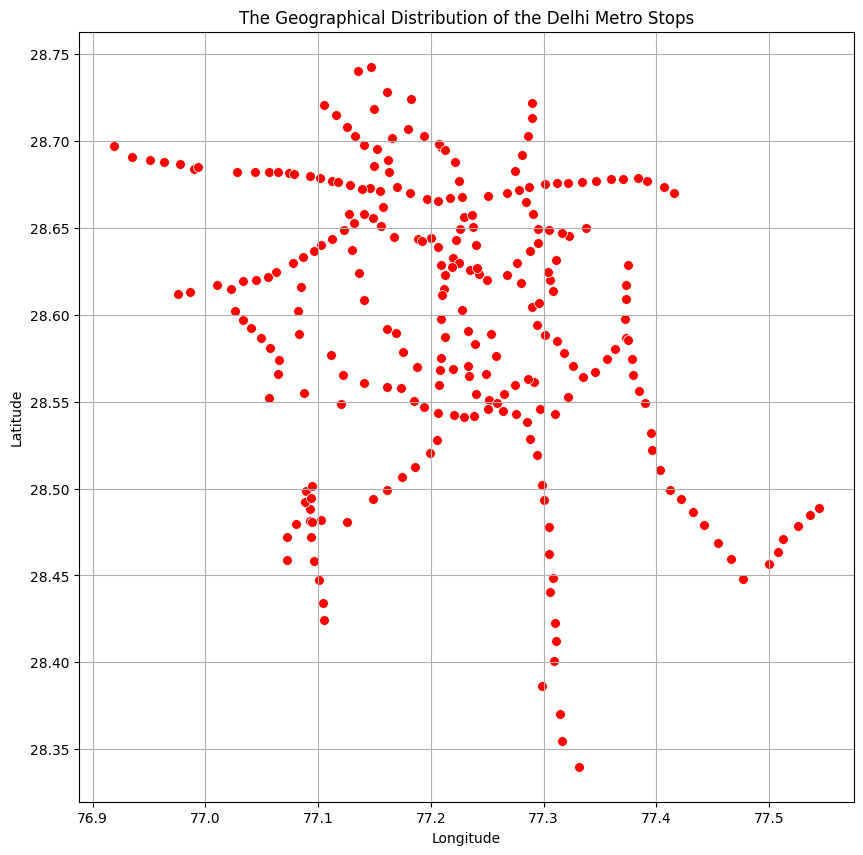

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
stops = pd.read_csv('stops.txt')
plt.figure(figsize=(10,10))
sns.scatterplot(x='stop_lon', y='stop_lat', data=stops, color='red', s=50, marker='o') 
plt.title('The Geographical Distribution of the Delhi Metro Stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [14]:
stops_with_routes = pd.merge(pd.merge(stop_times, trips, on='trip_id'), routes, on='route_id')
stop_route_counts = stops_with_routes.groupby('stop_id')['route_id'].nunique().reset_indeex()
stop_route_counts = stop_route_counts.rename(columns={'route_id': 'number_of_routes'})

stop_route_counts = pd.merge(stop_route_counts, stops, on='stop_id')

plt.figure(figsize=(10,10))
sns.scatterplot(x='stop_lon', y='stop_lat', size='number_of_routes', hue='number_of_routes',
                sizes=(50,500), alpha=0.5, palette='coolwarm', data=stop_route_counts)
plt.title('The number of the routes per metro stop in delhi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Number of the routes')
plt.grid(True)
plt.show()

NameError: name 'stop_times' is not defined

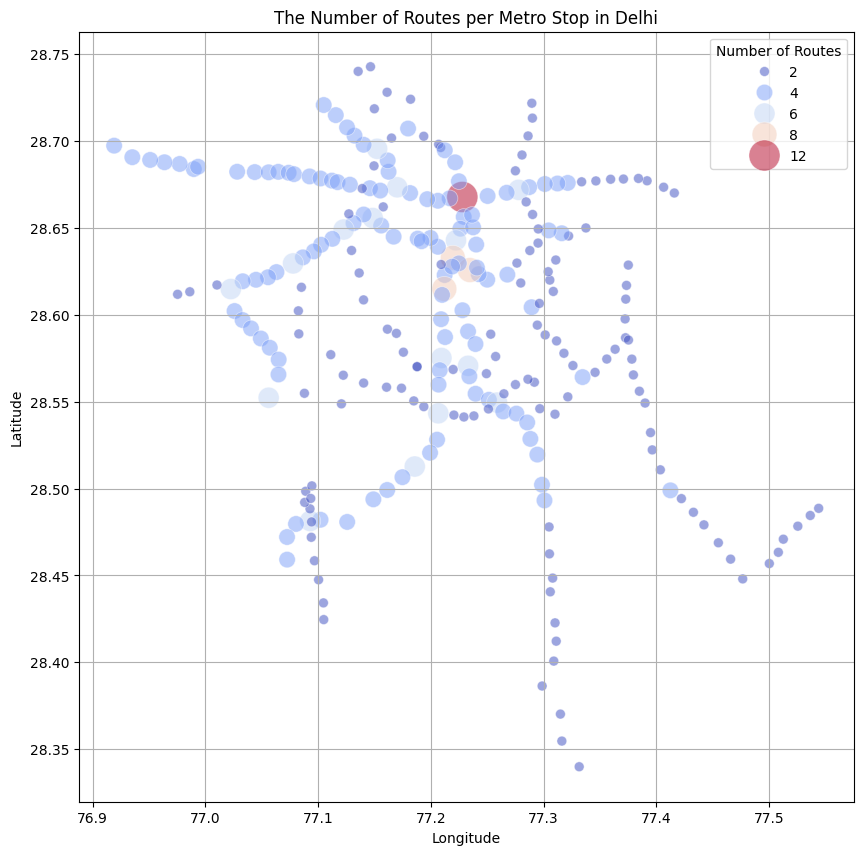

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
stop_times = pd.read_csv('stop_times.txt')
trips = pd.read_csv('trips.txt')
routes = pd.read_csv('routes.txt')
stops = pd.read_csv('stops.txt')

# Merge stop_times, trips, and routes
stops_with_routes = pd.merge(pd.merge(stop_times, trips, on='trip_id'), routes, on='route_id')

# Count the number of unique routes per stop
stop_route_counts = stops_with_routes.groupby('stop_id')['route_id'].nunique().reset_index()
stop_route_counts = stop_route_counts.rename(columns={'route_id': 'number_of_routes'})

# Merge with stops to get stop details
stop_route_counts = pd.merge(stop_route_counts, stops, on='stop_id')

# Create the scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x='stop_lon', y='stop_lat', size='number_of_routes', hue='number_of_routes',
                sizes=(50, 500), alpha=0.5, palette='coolwarm', data=stop_route_counts)
plt.title('The Number of Routes per Metro Stop in Delhi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Number of Routes')
plt.grid(True)
plt.show()


C:\Users\kaush\AppData\Local\Temp\ipykernel_24288\3768857346.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)
C:\Users\kaush\AppData\Local\Temp\ipykernel_24288\3768857346.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='part_of_day', y='interval_minutes', data=average_intervals, order=['Morning', 'Afternoon', 'Evening'], palette='mako')


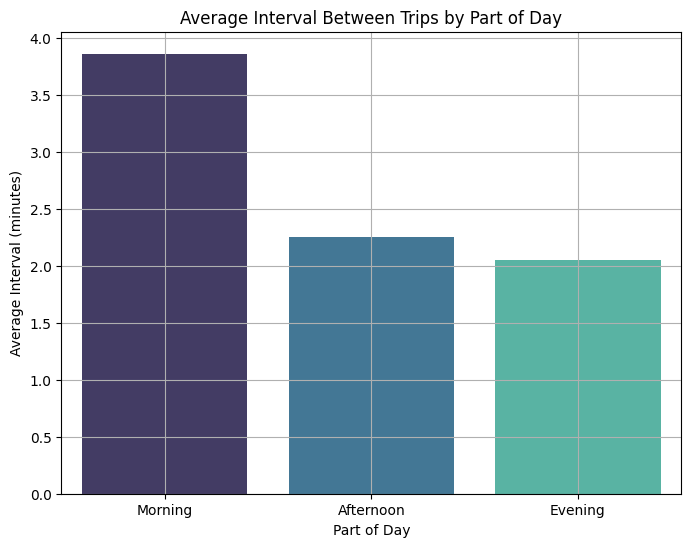

In [17]:
import datetime as dt

# function to convert time string to datetime.time
def convert_to_time(time_str):
    try:
        return dt.datetime.strptime(time_str, '%H:%M:%S').time()
    except ValueError:
        # Handle cases where the hour might be greater than 23 (e.g., 24:00:00 or 25:00:00)
        hour, minute, second = map(int, time_str.split(':'))
        return dt.time(hour % 24, minute, second)

stop_times['arrival_time_dt'] = stop_times['arrival_time'].apply(convert_to_time)

# calculate the difference in arrival times for subsequent trips at each stop
stop_times_sorted = stop_times.sort_values(by=['stop_id', 'arrival_time_dt'])
stop_times_sorted['next_arrival_time'] = stop_times_sorted.groupby('stop_id')['arrival_time_dt'].shift(-1)

# function to calculate the difference in minutes between two times
def time_difference(time1, time2):
    if pd.isna(time1) or pd.isna(time2):
        return None
    full_date_time1 = dt.datetime.combine(dt.date.today(), time1)
    full_date_time2 = dt.datetime.combine(dt.date.today(), time2)
    return (full_date_time2 - full_date_time1).seconds / 60

stop_times_sorted['interval_minutes'] = stop_times_sorted.apply(lambda row: time_difference(row['arrival_time_dt'], row['next_arrival_time']), axis=1)

# drop NaN values from intervals (last trip of the day)
stop_times_intervals = stop_times_sorted.dropna(subset=['interval_minutes'])

# average intervals by time of day (morning, afternoon, evening)
def part_of_day(time):
    if time < dt.time(12, 0):
        return 'Morning'
    elif time < dt.time(17, 0):
        return 'Afternoon'
    else:
        return 'Evening'

stop_times_intervals['part_of_day'] = stop_times_intervals['arrival_time_dt'].apply(part_of_day)
average_intervals = stop_times_intervals.groupby('part_of_day')['interval_minutes'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='part_of_day', y='interval_minutes', data=average_intervals, order=['Morning', 'Afternoon', 'Evening'], palette='mako')
plt.title('Average Interval Between Trips by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Average Interval (minutes)')
plt.grid(True)
plt.show()

C:\Users\kaush\AppData\Local\Temp\ipykernel_24288\2808342740.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_interval', y='number_of_trips', data=trips_per_interval, palette='Set2')


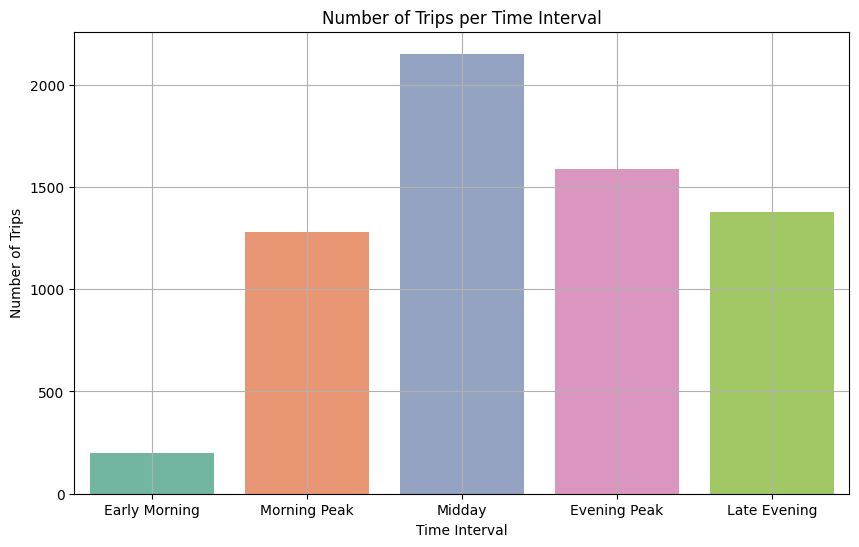

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Define the time classification function
def classify_time_interval(time):
    if time < dt.time(6, 0):
        return 'Early Morning'
    elif time < dt.time(10, 0):
        return 'Morning Peak'
    elif time < dt.time(16, 0):
        return 'Midday'
    elif time < dt.time(20, 0):
        return 'Evening Peak'
    else:
        return 'Late Evening' 

# Apply the classification function to the 'arrival_time_dt' column
stop_times['time_interval'] = stop_times['arrival_time_dt'].apply(classify_time_interval)

# Count unique trips per time interval
trips_per_interval = stop_times.groupby('time_interval')['trip_id'].nunique().reset_index()

# Rename the column to 'number_of_trips'
trips_per_interval = trips_per_interval.rename(columns={'trip_id': 'number_of_trips'})

# Define the ordered time intervals
ordered_intervals = ['Early Morning', 'Morning Peak', 'Midday', 'Evening Peak', 'Late Evening'] 
trips_per_interval['time_interval'] = pd.Categorical(trips_per_interval['time_interval'], categories=ordered_intervals, ordered=True)

# Sort the DataFrame by time intervals
trips_per_interval = trips_per_interval.sort_values('time_interval')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='time_interval', y='number_of_trips', data=trips_per_interval, palette='Set2')
plt.title('Number of Trips per Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()


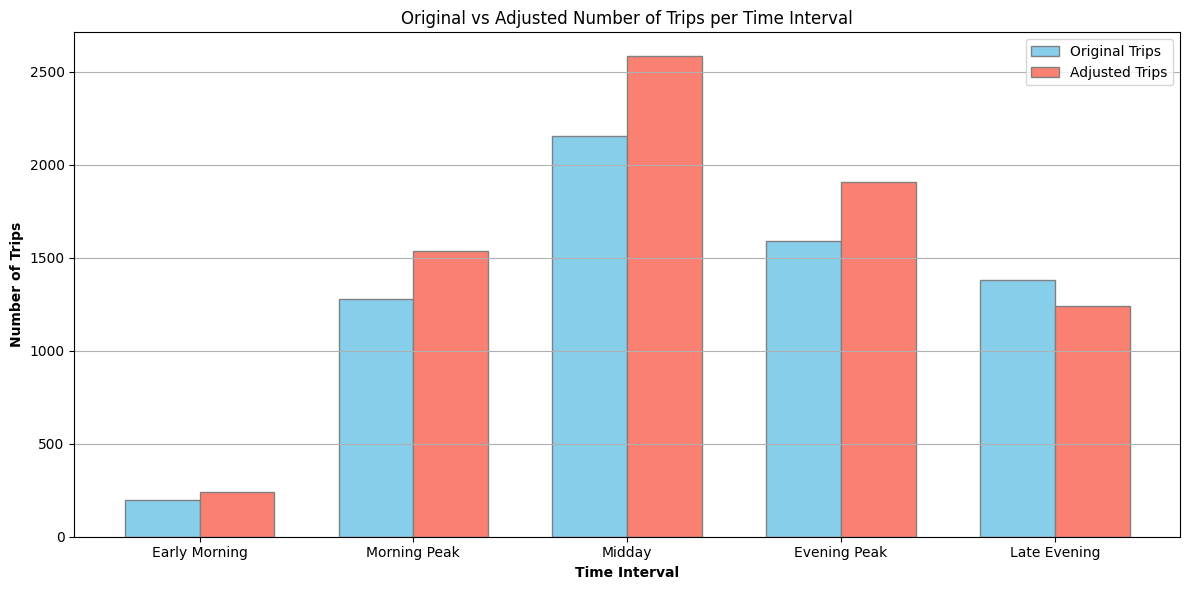

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming adjusted_trips_per_interval was previously defined correctly
adjusted_trips_interval = trips_per_interval.copy()
adjustment_factors = {
    'Morning Peak': 1.20,
    'Evening Peak': 1.20,
    'Midday': 1.20,
    'Early Morning': 1.20,
    'Late Evening': 0.90
}

# Apply adjustment factors to calculate adjusted number of trips
adjusted_trips_interval['adjusted_number_of_trips'] = adjusted_trips_interval.apply(
    lambda row: int(row['number_of_trips'] * adjustment_factors[row['time_interval']]), axis=1)

# Plotting the original and adjusted number of trips
plt.figure(figsize=(12, 6))
bar_width = 0.35 
r1 = range(len(adjusted_trips_interval))
r2 = [x + bar_width for x in r1] 

# Plot original trips
plt.bar(r1, adjusted_trips_interval['number_of_trips'], color='skyblue', width=bar_width, edgecolor='grey', label='Original Trips')
# Plot adjusted trips
plt.bar(r2, adjusted_trips_interval['adjusted_number_of_trips'], color='salmon', width=bar_width, edgecolor='grey', label='Adjusted Trips')

plt.xlabel('Time Interval', fontweight='bold')
plt.ylabel('Number of Trips', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(adjusted_trips_interval))], adjusted_trips_interval['time_interval'])
plt.title('Original vs Adjusted Number of Trips per Time Interval')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
